In [1]:
# import relevant packages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress tf warnings

gpu_num = 0 # Number of the GPU to be used
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    try:
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

import sys
sys.path.append('../') # to access all relevant repo files

%load_ext autoreload
%autoreload 2

from utils import E2E_Model, Parameters, load_weights, plot_results, sample_along_trajectory, serialize_example
import numpy as np

import sionna
from sionna.rt import load_scene, Transmitter, Receiver, PlanarArray, Camera
from sionna.nr import CarrierConfig
from sionna.utils import split_dim


Number of GPUs available : 1
Only GPU number 0 used.
done!


# All Plots

In [2]:
def lims(mcs_idx, num_tx_eval, ber):
    ylim = [7e-4,1.1e0]
    # xlim = [-15, 30]

    if ber: # --------------------------- BER Limits

        if mcs_idx==0:
            ylim = [5e-3,1.6e-1]
            xlim = [-10,-1]
        if mcs_idx==1:
            ylim = [5e-3,1.8e-1]
            xlim = [-6.5,9]
        if mcs_idx==2:
            ylim = [5e-3,1.6e-1]
            xlim = [-7,8]

    else: # --------------------------- BLER Limits
        ylim = [7e-4,1.1e0]
        if mcs_idx==0:
            xlim = [-11, -1.5]
        if mcs_idx==1:
            xlim = [-9, 0.5]
        if mcs_idx==2:
            xlim = [-7, 2.5]       
    
    return xlim, ylim

In [53]:
def lims(mcs_idx, num_tx_eval, ber):


    # else: # --------------------------- BLER Limits
    ylim = [3e-4,1.1e0]
    
    x0=-10.5
    x_step = 2
    x_range = 8
    xlim = []
    if mcs_idx==0:
        xlim.append(x0)
    if mcs_idx==1:
        xlim.append(x0+x_step)
    if mcs_idx==2:
        xlim.append(x0+2*x_step)
        
    tx_step = .5
    if num_tx_eval==1:
        xlim = [v for v in xlim]
    if num_tx_eval==2:
        xlim = [v + tx_step for v in xlim]
    if num_tx_eval==3:
        xlim = [v + 2*tx_step for v in xlim]  
    if num_tx_eval==4:
        xlim = [v + 3*tx_step for v in xlim]           

    xlim.append(xlim[0]+x_range)

    if ber: # --------------------------- BER Limits
        ylim = [5e-5,2e-1]
        
        if mcs_idx==0:
            ylim = [8e-6,3e-1]
            # xlim = [-10,-1]
        if mcs_idx==1:
            ylim = [8e-6,2.1e-1]
            # xlim = [-6.5,9]
        if mcs_idx==2:
            ylim = [8e-6,1.8e-1]
            # xlim = [-7,8]

    
    return xlim, ylim

No results found
No results found
No results found
No results found
No results found
No results found
No results found
No results found
No results found
No results found
No results found
No results found


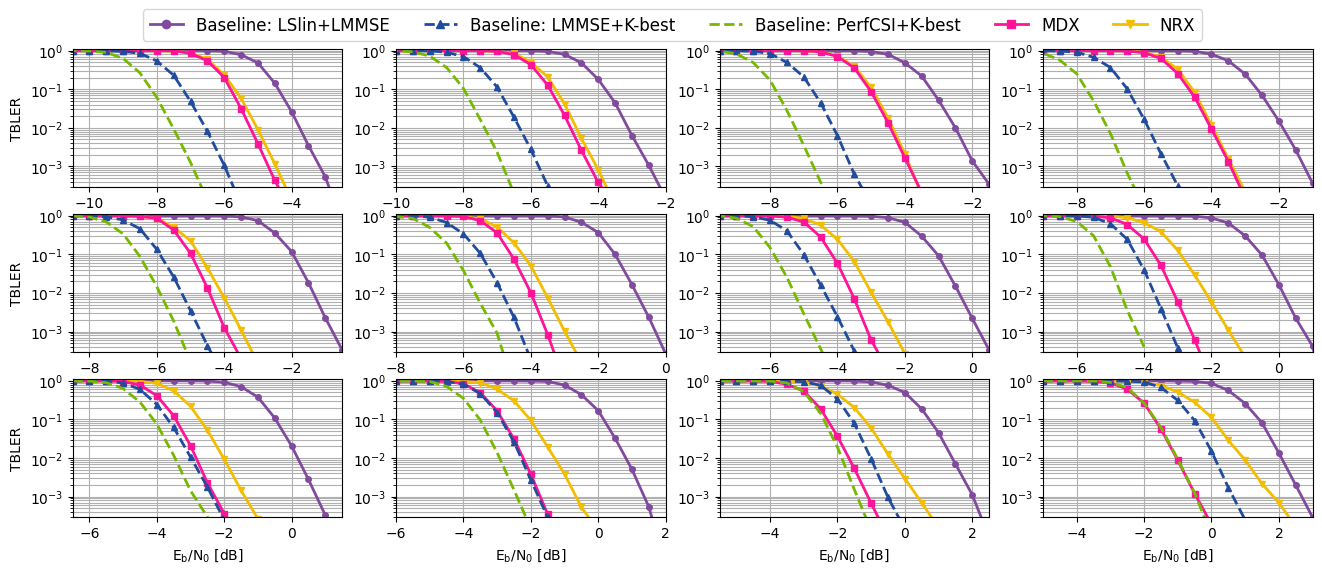

In [77]:
#  mcs x num_tx 


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

import os

current_directory = f"{os.getcwd()}/"

show_ber = False
# show_ber = True

# show_ber = True # ----------
# ylim = [7e-3,1.3e-1]
# xlim = [-5,5]

# ylim = [1e-3,4e-1]
# xlim = [-15,11]

# ylim = [5e-3,2e-1]
# xlim = [-6.5,8]

# style, color, marker, marker size * v
style_lslin = ["-",2,'o',4]
style_lmmse = ["--",4,'^',4]
style_perf  = ["--",0,'',4]
style_mdx   = ["-",8,'s',4]
style_nrx_large = ["-",1,'v',4]
style_nrx_rt = ["-",5,'',4]


label_lslin = "Baseline: LSlin+LMMSE"
label_lmmse = "Baseline: LMMSE+K-best"
label_perf  = "Baseline: PerfCSI+K-best"
label_mdx   = "MDX"
label_nrx_large = "NRX"
COLORMAP = ['#76B900', '#F3BD00','#814B9D','#5C5C5C','#214B9D', '#e48aa7', '#7c4848', '#78A2EB', '#ff1397', '#bee7dd']




fig_, axes = plt.subplots(3, 4, figsize=(16, 12))

for mcs_i in range(3): # MCS index
    for num_tx_i in range(4): # Num_tx-1
        ax = axes[mcs_i, num_tx_i]
        fig = None

        show_title = show_x_label = show_y_label = show_legend = show_x_ticks = show_y_ticks = False
        if num_tx_i==0:
        #     show_y_ticks = True
            show_y_label = True
        if mcs_i==2:
        #     show_x_ticks = True
            show_x_label = True
        show = [show_title, show_x_label, show_y_label, show_legend, show_x_ticks, show_y_ticks]

        num_tx_eval = num_tx_i+1
        mcs_idx = mcs_i



        xlim, ylim = lims(mcs_idx, num_tx_eval, show_ber)


        # ---- LS
        results_dir=[current_directory, ""]
        config_name="baselines_16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[label_lslin,f"-{label_perf}",f"-{label_lmmse}"], line_styles=[style_lslin,style_perf,style_lmmse], axis=ax, show=show)




        # ---- NRX
        if mcs_idx==1:
            results_dir=[current_directory, f""]
            config_name="nrx_large_16x4.cfg"
            fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=0,
                            xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                            labels=[f"{label_nrx_large}"], line_styles=[style_nrx_large], axis=ax, show=show)
                   
        if mcs_i==0:
            results_dir=[current_directory, f""]
            config_name = "nrx_large_16x4_4qam.cfg" # NRX:large
            fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=0,
                            xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                            labels=[f"{label_nrx_large}"], line_styles=[style_nrx_large], axis=ax, show=show)

          
        if mcs_i==2:
            results_dir=[current_directory, f""]
            config_name = "nrx_large_16x4_64qam.cfg" # NRX:large
            fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=0,
                            xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                            labels=[f"{label_nrx_large}"], line_styles=[style_nrx_large], axis=ax, show=show)
                 

        # ---- MDX EXT 4x2 eval on 16x4
        results_dir=[current_directory, f"_mcs{mcs_idx}"]
        config_name="mdx_res_blocks2_var_mcs_it1_ext_eval16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_mdx}"], line_styles=[style_mdx], axis=ax, show=show)


       

        # ---- LMMSE
        results_dir=[current_directory, ""]
        config_name=f"mdx_var_mcs_BSL_LMMSE_16x4_mcs{mcs_idx}.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_lmmse}"], line_styles=[style_lmmse], axis=ax, show=show)


        
        # ---- Perf
        results_dir=[current_directory, "_mcs1s"]
        config_name="baselines_16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_perf}",f"-{label_lmmse}"], line_styles=[style_perf,style_lmmse], axis=ax, show=show)
        
        results_dir=[current_directory, "_mcs0"]
        config_name="baselines_16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_perf}",f"-{label_lmmse}"], line_styles=[style_perf,style_lmmse], axis=ax, show=show)

        results_dir=[current_directory, "_mcs0_"]
        config_name="baselines_16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_perf}",f"-{label_lmmse}"], line_styles=[style_perf,style_lmmse], axis=ax, show=show)

        results_dir=[current_directory, "_mcs1"]
        config_name="baselines_16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_perf}",f"-{label_lmmse}"], line_styles=[style_perf,style_lmmse], axis=ax, show=show)

        results_dir=[current_directory, "_mcs1_"]
        config_name="baselines_16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_perf}",f"-{label_lmmse}"], line_styles=[style_perf,style_lmmse], axis=ax, show=show)        

        results_dir=[current_directory, "_mcs2"]
        config_name="baselines_16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_perf}",f"-{label_lmmse}"], line_styles=[style_perf,style_lmmse], axis=ax, show=show)

        results_dir=[current_directory, "_mcs2_"]
        config_name="baselines_16x4.cfg"
        fig = plot_results(fig=fig, config_name=config_name, num_tx_eval=num_tx_eval,mcs_arr_eval_idx=mcs_idx,
                     xlim=xlim, ylim=ylim, color_offset=0,show_ber=show_ber,results_dir=results_dir,
                     labels=[f"{label_perf}",f"-{label_lmmse}"], line_styles=[style_perf,style_lmmse], axis=ax, show=show)     

# Create legend elements
lw=2
legend_elements = [
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_lslin[1]], linestyle=style_lslin[0], marker=style_lslin[2], label=label_lslin),   # LS
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_lmmse[1]], linestyle=style_lmmse[0], marker=style_lmmse[2], label=label_lmmse),   # LMMSE
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_perf[1]], linestyle=style_perf[0], marker=style_perf[2], label=label_perf),      # Perf
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_mdx[1]], linestyle=style_mdx[0], marker=style_mdx[2], label=label_mdx),         # MDX     
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_nrx_large[1]], linestyle=style_nrx_large[0], marker=style_nrx_large[2], label=label_nrx_large),# NRX large
]


fig_.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0.5), ncol=6,fontsize=12)

# fig_.text(0.5, 0.61, f"MIMO 16x4 TDL A Channel, 273PRBs", fontsize=16, ha='center', va='top')

fig_.subplots_adjust(top=.5)

# save
ber_str = "ber"
if not show_ber:
    ber_str = "bler"
fig_.savefig(f"{ber_str}_16x4_tdla.png", dpi=300, bbox_inches="tight", transparent=True)
# fig_.savefig(f"{ber_str}_16x4_tdla.pdf", dpi=300, bbox_inches="tight", format="pdf", facecolor='white', transparent=True)